# We will create a predictive maintenance model for a delivery company

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100) 

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
ls

Model for a delivery company.ipynb  failure.csv


In [3]:
df=pd.read_csv('failure.csv')

In [4]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [5]:
df.shape

(124494, 12)

In [6]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [7]:
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [8]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [10]:
df.drop('date', axis=1, inplace=True)

In [11]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [12]:
import re

In [13]:
df['device'] = df['device'].apply(lambda x: re.sub('[^0-9]', '', x))

In [14]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,101085,0,215630672,56,0,52,6,407438,0,0,7
1,10166,0,61370680,0,3,0,6,403174,0,0,0
2,1016,0,173295968,0,0,0,12,237394,0,0,0
3,1010,0,79694024,0,0,0,6,410186,0,0,0
4,1012,0,135970480,0,0,0,15,313173,0,0,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   device      124494 non-null  object
 1   failure     124494 non-null  int64 
 2   attribute1  124494 non-null  int64 
 3   attribute2  124494 non-null  int64 
 4   attribute3  124494 non-null  int64 
 5   attribute4  124494 non-null  int64 
 6   attribute5  124494 non-null  int64 
 7   attribute6  124494 non-null  int64 
 8   attribute7  124494 non-null  int64 
 9   attribute8  124494 non-null  int64 
 10  attribute9  124494 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 10.4+ MB


In [16]:
df['device'] =df['device'].astype('int32')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   device      124494 non-null  int32
 1   failure     124494 non-null  int64
 2   attribute1  124494 non-null  int64
 3   attribute2  124494 non-null  int64
 4   attribute3  124494 non-null  int64
 5   attribute4  124494 non-null  int64
 6   attribute5  124494 non-null  int64
 7   attribute6  124494 non-null  int64
 8   attribute7  124494 non-null  int64
 9   attribute8  124494 non-null  int64
 10  attribute9  124494 non-null  int64
dtypes: int32(1), int64(10)
memory usage: 10.0 MB


In [18]:
x=df.drop('failure',axis=1)
y=df[['failure']]

In [19]:
import seaborn as sns

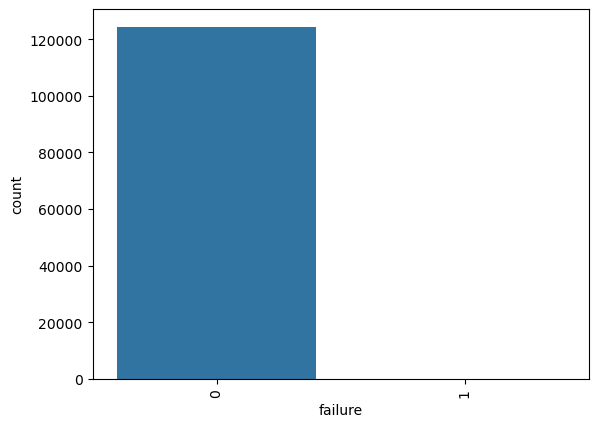

In [20]:
sns.countplot(x=df['failure'])
plt.xticks(rotation=90);

In [21]:
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [22]:
x

,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,101085,215630672,56,0,52,6,407438,0,0,7
1,10166,61370680,0,3,0,6,403174,0,0,0
2,1016,173295968,0,0,0,12,237394,0,0,0
3,1010,79694024,0,0,0,6,410186,0,0,0
4,1012,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...
124489,101,18310224,0,0,0,10,353705,8,8,0
124490,108,172556680,96,107,4,11,332792,0,0,13
124491,1005,19029120,4832,0,0,11,350410,0,0,0
124492,103,226953408,0,0,0,12,358980,0,0,0


In [23]:
y

,failure
0,0
1,0
2,0
3,0
4,0
...,...
124489,0
124490,0
124491,0
124492,0


In [24]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [28]:
from  sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

In [29]:
model_classification(x,y)

Model:  GaussianNB()
Model Accuracy:  0.5832808543137754
Model Confusion Matrix:  [[36998 30893]
 [  208  6534]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.99      0.54      0.70     67891
           1       0.17      0.97      0.30      6742

    accuracy                           0.58     74633
   macro avg       0.58      0.76      0.50     74633
weighted avg       0.92      0.58      0.67     74633

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.8863371430868383
Model Confusion Matrix:  [[35985  7262]
 [ 1221 30165]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.97      0.83      0.89     43247
           1       0.81      0.96      0.88     31386

    accuracy                           0.89     74633
   macro avg       0.89      0.90      0.89     74633
weighted avg       0.90      0.89      0.89     74633

----

(RandomForestClassifier(),
 0.9995712352444629,
 array([[29616,  3657],
        [ 7590, 33770]]))